In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import time
data = []
datapath = '/home/bigdatas16/1301.csv'
data = pd.read_csv(datapath)
 
# Close Rise Ratio 漲幅比
def RR(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['Close'][item]-data['Close'][item-1])/data['Close'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR']=tmpSeries
RR(data)
# 相對強弱指標(RSI) 建議6
def RSI(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)   
            bolRise = data['RR'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    tmpSeries = pd.Series(tmpList)
    data['RSI'+str(day)] = tmpSeries

# High Rise Ratio 漲幅比
def RR_H(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        if item - 1 >=0:
            tmp = (data['High'][item]-data['High'][item-1])/data['High'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR_H']=tmpSeries
RR_H(data)
# 相對強弱指標(RSI) 建議6
def RSI_H(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        if item - day >= 0:
            bolRise = data['RR_H'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR_H'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR_H'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR_H'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI_H'+str(day)] = tmpSeries
    
start = time.time()       
for i in range(2,18):
    RSI(data,i)
for i in range(2,18):
    RSI_H(data,i)
end = time.time()
print "Create features rsi : Time taken = %f second"%(end - start)

#data = data.drop(data.index[4620])    

Populating the interactive namespace from numpy and matplotlib
Create features rsi : Time taken = 839.265976 second


In [2]:
data.head()

,Date,Open,High,Low,Close,Volume_n,Volume_m,return,PE,RR,...,RSI_H8,RSI_H9,RSI_H10,RSI_H11,RSI_H12,RSI_H13,RSI_H14,RSI_H15,RSI_H16,RSI_H17
0,1998/1/3,14.19,14.30,14.08,14.19,"5,353","342,631",0.7874,31.68,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998/1/5,14.19,14.30,13.97,13.97,"8,297","528,813",-1.5625,31.19,-1.550388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1998/1/6,13.97,13.97,13.64,13.64,"8,299","514,796",-2.3810,30.45,-2.362205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1998/1/7,13.64,13.86,13.53,13.64,"7,071","436,753",0.0000,30.45,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1998/1/8,13.75,14.08,13.64,13.75,"14,833","927,179",0.8130,30.69,0.806452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 43 columns):
Date        4620 non-null object
Open        4620 non-null float64
High        4620 non-null float64
Low         4620 non-null float64
Close       4620 non-null float64
Volume_n    4620 non-null object
Volume_m    4620 non-null object
return      4620 non-null float64
PE          4620 non-null float64
RR          4620 non-null float64
RR_H        4620 non-null float64
RSI2        4620 non-null float64
RSI3        4620 non-null float64
RSI4        4620 non-null float64
RSI5        4620 non-null float64
RSI6        4620 non-null float64
RSI7        4620 non-null float64
RSI8        4620 non-null float64
RSI9        4620 non-null float64
RSI10       4620 non-null float64
RSI11       4620 non-null float64
RSI12       4620 non-null float64
RSI13       4620 non-null float64
RSI14       4620 non-null float64
RSI15       4620 non-null float64
RSI16       4620 non-null float64
RSI17       

In [4]:
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries
UP_DOWN(data)

data1 = data.drop(['Date', 'Open', 'High','Low','Close','Volume_n','Volume_m','return','PE','RR','RR_H'], axis=1)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 33 columns):
RSI2       4620 non-null float64
RSI3       4620 non-null float64
RSI4       4620 non-null float64
RSI5       4620 non-null float64
RSI6       4620 non-null float64
RSI7       4620 non-null float64
RSI8       4620 non-null float64
RSI9       4620 non-null float64
RSI10      4620 non-null float64
RSI11      4620 non-null float64
RSI12      4620 non-null float64
RSI13      4620 non-null float64
RSI14      4620 non-null float64
RSI15      4620 non-null float64
RSI16      4620 non-null float64
RSI17      4620 non-null float64
RSI_H2     4620 non-null float64
RSI_H3     4620 non-null float64
RSI_H4     4620 non-null float64
RSI_H5     4620 non-null float64
RSI_H6     4620 non-null float64
RSI_H7     4620 non-null float64
RSI_H8     4620 non-null float64
RSI_H9     4620 non-null float64
RSI_H10    4620 non-null float64
RSI_H11    4620 non-null float64
RSI_H12    4620 non-null float64
RS

In [6]:
cols = data1.columns.tolist()
cols[32]

'UP_DOWN'

In [7]:
data1 = data1.fillna(-1)
cols = data1.columns.tolist()
cols[32]
data1 = data1[[cols[32]] + cols[0:31]]
n = len(data['Date'])/5
m = len(data['Date']) - n
train_data = data1.iloc[:m,:]

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 32 columns):
UP_DOWN    3696 non-null int64
RSI2       3696 non-null float64
RSI3       3696 non-null float64
RSI4       3696 non-null float64
RSI5       3696 non-null float64
RSI6       3696 non-null float64
RSI7       3696 non-null float64
RSI8       3696 non-null float64
RSI9       3696 non-null float64
RSI10      3696 non-null float64
RSI11      3696 non-null float64
RSI12      3696 non-null float64
RSI13      3696 non-null float64
RSI14      3696 non-null float64
RSI15      3696 non-null float64
RSI16      3696 non-null float64
RSI17      3696 non-null float64
RSI_H2     3696 non-null float64
RSI_H3     3696 non-null float64
RSI_H4     3696 non-null float64
RSI_H5     3696 non-null float64
RSI_H6     3696 non-null float64
RSI_H7     3696 non-null float64
RSI_H8     3696 non-null float64
RSI_H9     3696 non-null float64
RSI_H10    3696 non-null float64
RSI_H11    3696 non-null float64
RSI_

hyperparametr tuning cross validation 5 folds

In [9]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
import time 
sql_sc = SQLContext(sc)
train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]

cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])


assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_H2","RSI_H3","RSI_H4","RSI_H5","RSI_H6"
                                       ,"RSI_H7","RSI_H8","RSI_H9","RSI_H10","RSI_H11","RSI_H12"
                                       ,"RSI_H13","RSI_H14","RSI_H15","RSI_H16"], outputCol="features")
for i in range(0,5,1):
    cross_sql[i] = assembler1.transform(cross_sql[i])
    
frames = [i for i in range(1,6)]
for i in range(0,5):
    #print(i)
    frames[i] = pd.concat([cross_data_pandas[(i+1)%5],cross_data_pandas[(i+2)%5],cross_data_pandas[(i+3)%5],cross_data_pandas[(i+4)%5]])
    result_sql = [i for i in range(1,6)]

for i in range(0,5):   
    result_sql[i] = sql_sc.createDataFrame(frames[i])   
    
assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_H2","RSI_H3","RSI_H4","RSI_H5","RSI_H6"
                                       ,"RSI_H7","RSI_H8","RSI_H9","RSI_H10","RSI_H11","RSI_H12"
                                       ,"RSI_H13","RSI_H14","RSI_H15","RSI_H16"],outputCol="features")
for i in range(0,5):  
    result_sql[i] = assembler1.transform(result_sql[i])

start = time.time()

cv5_test_error = []    
maxBins_numTrees_maxDepth = []    
for l in range(15,40,5):
    for j in range(1,8,1):
        for k in range(1,10,1):
            Test_Error = []
            for i in range(0,5):
                labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(result_sql[i])
                featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(result_sql[i])
                #rf = RandomForestClassifier(labelCol="labelIndexer", featuresCol="features")
                rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = k,maxDepth = j,maxBins = l)
                # Chain indexers and forest in a Pipeline
                pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
                model = pipeline.fit(result_sql[i])
                predictions = model.transform(cross_sql[i])
                evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel"
                                                              , predictionCol="prediction",metricName = "precision")
                accuracy = evaluator.evaluate(predictions)
                print("[%g,%g,%g] : Test Error(%d) = %g" % (k,j,l,i,1.0 - accuracy))
                Test_Error.append(1.0 - accuracy)
            cv5_test_error.append(mean(Test_Error))
            maxBins_numTrees_maxDepth.append([k,j,l])

end = time.time()
print "Cross Validation 5 Folds Hyperparameter Tuning : Time taken = %f second"%(end - start)
        
    
mintest = np.min(cv5_test_error)
c = []
for i in range(len(cv5_test_error)):
    c.append(np.min(cv5_test_error) == cv5_test_error[i])
    
for i in range(len(cv5_test_error)):    
    if c[i] == True:
        print(maxBins_numTrees_maxDepth[i],mintest)             

[1,1,15] : Test Error(0) = 0.488498
[1,1,15] : Test Error(1) = 0.427605
[1,1,15] : Test Error(2) = 0.480379
[1,1,15] : Test Error(3) = 0.486815
[1,1,15] : Test Error(4) = 0.487838
[2,1,15] : Test Error(0) = 0.377537
[2,1,15] : Test Error(1) = 0.433018
[2,1,15] : Test Error(2) = 0.441137
[2,1,15] : Test Error(3) = 0.486815
[2,1,15] : Test Error(4) = 0.486486
[3,1,15] : Test Error(0) = 0.391069
[3,1,15] : Test Error(1) = 0.435724
[3,1,15] : Test Error(2) = 0.446549
[3,1,15] : Test Error(3) = 0.486815
[3,1,15] : Test Error(4) = 0.475676
[4,1,15] : Test Error(0) = 0.428958
[4,1,15] : Test Error(1) = 0.435724
[4,1,15] : Test Error(2) = 0.441137
[4,1,15] : Test Error(3) = 0.484787
[4,1,15] : Test Error(4) = 0.487838
[5,1,15] : Test Error(0) = 0.388363
[5,1,15] : Test Error(1) = 0.426252
[5,1,15] : Test Error(2) = 0.450609
[5,1,15] : Test Error(3) = 0.480054
[5,1,15] : Test Error(4) = 0.472973
[6,1,15] : Test Error(0) = 0.473613
[6,1,15] : Test Error(1) = 0.428958
[6,1,15] : Test Error(2) = 0

predict

In [10]:
train_data = data1.iloc[:m,:]
train_sql = sql_sc.createDataFrame(train_data)
test_data = data1.iloc[m:,:]
test_sql = sql_sc.createDataFrame(test_data)

assembler1 = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_H2","RSI_H3","RSI_H4","RSI_H5","RSI_H6"
                                       ,"RSI_H7","RSI_H8","RSI_H9","RSI_H10","RSI_H11","RSI_H12"
                                       ,"RSI_H13","RSI_H14","RSI_H15","RSI_H16"],outputCol="features")
train_sql = assembler1.transform(train_sql)
labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(train_sql)
featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(train_sql)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = 9,maxDepth = 7,maxBins = 20)
pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
model = pipeline.fit(train_sql)
assembler = VectorAssembler(inputCols=["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
                                       ,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
                                       ,"RSI17","RSI_H2","RSI_H3","RSI_H4","RSI_H5","RSI_H6"
                                       ,"RSI_H7","RSI_H8","RSI_H9","RSI_H10","RSI_H11","RSI_H12"
                                       ,"RSI_H13","RSI_H14","RSI_H15","RSI_H16"],outputCol="features")
test_sql = assembler.transform(test_sql)
predictions = model.transform(test_sql)
#evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="precision")
#accuracy = evaluator.evaluate(predictions)


Feature Importance

In [11]:
pd.DataFrame(["RSI2","RSI3","RSI4","RSI5","RSI6","RSI7","RSI8"
,"RSI9","RSI10","RSI11","RSI12","RSI13","RSI14","RSI15"
,"RSI17","RSI_H2","RSI_H3","RSI_H4","RSI_H5","RSI_H6"
,"RSI_H7","RSI_H8","RSI_H9","RSI_H10","RSI_H11","RSI_H12"
,"RSI_H13","RSI_H14","RSI_H15","RSI_H16"])

,0
0,RSI2
1,RSI3
2,RSI4
3,RSI5
4,RSI6
5,RSI7
6,RSI8
7,RSI9
8,RSI10
9,RSI11


In [12]:
print(model.stages[2]._call_java('toDebugString'))

RandomForestClassificationModel (uid=rfc_3e4586b3a75f) with 9 trees
  Tree 0 (weight 1.0):
    If (feature 13 <= 48.690131059321594)
     If (feature 27 <= 56.10766186101392)
      If (feature 8 <= 52.728495337655254)
       If (feature 28 <= 54.59606453267048)
        If (feature 22 <= 33.874048121722545)
         If (feature 16 <= 28.430991162511997)
          If (feature 20 <= 43.398055954209)
           Predict: 1.0
          Else (feature 20 > 43.398055954209)
           Predict: 0.0
         Else (feature 16 > 28.430991162511997)
          If (feature 3 <= 34.4036295891808)
           Predict: 1.0
          Else (feature 3 > 34.4036295891808)
           Predict: 1.0
        Else (feature 22 > 33.874048121722545)
         If (feature 6 <= 54.60671893759091)
          If (feature 15 <= 95.36145008206674)
           Predict: 0.0
          Else (feature 15 > 95.36145008206674)
           Predict: 1.0
         Else (feature 6 > 54.60671893759091)
          If (feature 11 <= 49.9958691

In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
prediction_1101 = predictions.select("prediction", "indexedLabel")
prediction_1101_pandas = prediction_1101.toPandas()
cm = confusion_matrix(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'])
pd.crosstab(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'], rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,359,121
1.0,341,103


In [15]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

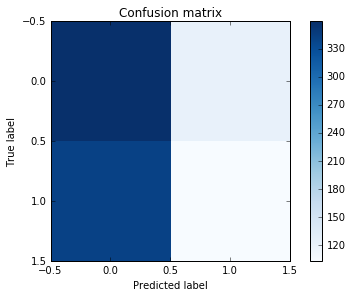

In [16]:
plot_confusion_matrix(cm)
plt.show()

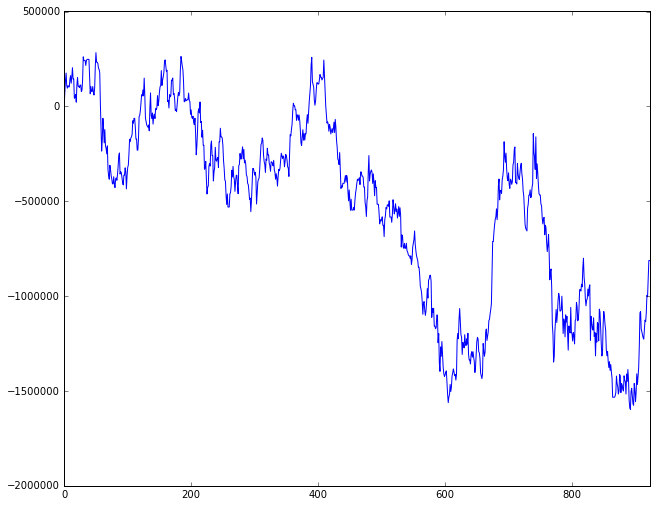

In [17]:
data_p = data[['Close','Open']][(4621-n):4622].values
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result2 = pd.concat([data_p1, result1], axis=1)
result2["Cl - Op"] = result2['Close'] - result2['Open']
result2['prediction'] = result2['prediction'].replace(0,-1)
result2['profit'] = 1000*result2['Open'] * result2['Cl - Op'] * result2['prediction']
a = result2['profit'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

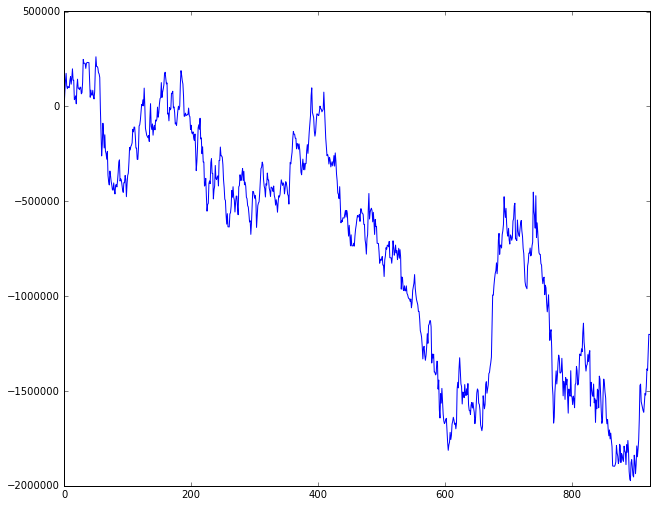

In [18]:
result2['processing fee1'] = np.where(result2['prediction'] == 1,1000*(result2['Close']*(4.425/1000.0) + result2['Open']*(1.425/1000.0))*1
                                      ,1000*(result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)))
result2['profit_r_fee'] = result2['profit'] -  result2['processing fee1']
b = result2['profit_r_fee'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
b.plot()

In [19]:
data_p = data[['Close','Open']][(4621-n):4622].values
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result2 = pd.concat([data_p1, result1], axis=1)
result2["Cl - Op"] = result2['Close'] - result2['Open']
result2['prediction'] = result2['prediction'].replace(0,-1)
result2['profit'] = 1000*result2['Open'] * result2['Cl - Op'] * result2['prediction']
data_PE = data[['PE']][(4621-n):4622].values
data_PE = pd.DataFrame(data_PE,columns = ['PE'])
result2 = pd.concat([data_PE, result2], axis=1)
result2['profit2'] = 0.0
result2['profit2'][0] = 0 
for i in range(5,len(result2)-1,1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == -1: #and result2['PE'][i] < result2['PE'][i-5:i-1].mean():
        result2['profit2'][i+1] = result2['profit2'][i] + 1000 * (-1) * result2['Open'][i+1]
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['profit2'][i+1] = result2['profit2'][i] 
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == 1: #and result2['PE'][i] > result2['PE'][i-5:i-1].mean():
        result2['profit2'][i+1] = result2['profit2'][i] + 1000 * result2['Open'][i+1]
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == -1:
        result2['profit2'][i+1] = result2['profit2'][i] 

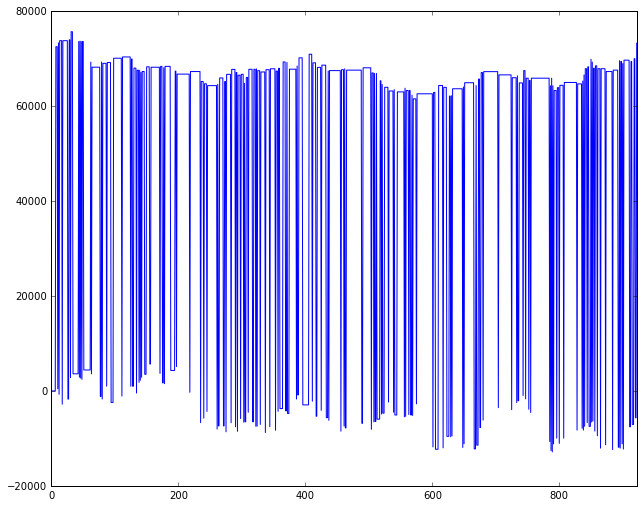

In [20]:
result2['profit2'].plot()

In [21]:
result2['processing_fee_2'] = 0.0
result2['processing_fee_2'][0] = 0#(-1) * result2['Open'][0]

for i in range(5,len(result2)-1,1):
    if result2['prediction'][i+1] == 1 and result2['prediction'][i] == -1: #and result2['PE'][i] < result2['PE'][i-5:i-1].mean():
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + 1000 * (-1) * result2['Open'][i+1] - (1000 * result2['Open'][i+1])*((1.425/1000.0))
    elif result2['prediction'][i+1] == 1 and result2['prediction'][i] == 1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == 1: #and result2['PE'][i] > result2['PE'][i-5:i-1].mean():
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i] + 1000 * result2['Open'][i+1] - (1000 * result2['Open'][i+1])*(4.425/1000.0)
    elif result2['prediction'][i+1] == -1 and result2['prediction'][i] == -1:
        result2['processing_fee_2'][i+1] = result2['processing_fee_2'][i]

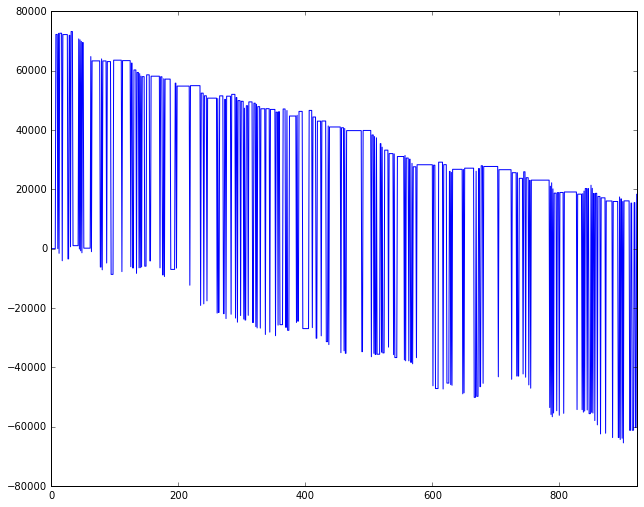

In [22]:
result2['processing_fee_2'].plot()#[1101:2301].plot()